## Задача 2. Аппроксимация функции
Рассмотрим сложную математическую функцию на отрезке [1, 15]  

$$ f(x) = \sin(\frac{x}{5}) \cdot e^{\frac{x}{10}} + 5 \cdot e^{\frac{-x}{2}} $$

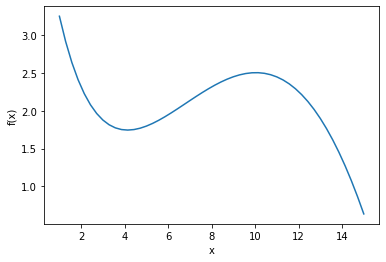

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    result = np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)
    return result

x = np.linspace(1, 15, 50) # генерируем 50 значений от 1 до 15 включительно
y = f(x)
plt.plot(x, y)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

Задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.
Сформируем систему линейных уравнений (то есть зададим матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15.

Многочлен первой степени имеет вид: $ a_0 + a_1 \cdot x = p(x) $

Найдём значение функции f в точках 1 и 15.

In [5]:
coordinate_1 = [1, f(1)]
coordinate_2 = [15, f(15)]
print('Значение функции в точке x = 1 равно f(1) =', coordinate_1[1], 
      '\nЗначение функции в точке x = 15 равно f(15) =', coordinate_2[1])

Значение функции в точке x = 1 равно f(1) = 3.252216865271419 
Значение функции в точке x = 15 равно f(15) = 0.6352214195786656


Найдём коэффициенты $a_n$ многочлена первой степени $p(x)$, зная, через какие точки он проходит.

$$ \begin{cases}\begin{array}{11} a_0 + a_1\cdot 1 = 3.252216865271419 \\ a_0 + a_1 \cdot 15 = 0.6352214195786656 \end{array}\end{cases} $$

Матрица коэффициентов A и свободный вектор b:

$$ A = \begin{pmatrix} 1 & 1 \\ 1 & 15 \end{pmatrix} \qquad b = \begin{pmatrix} 3.252216865271419 \\ 0.6352214195786656 \end{pmatrix} $$

Решим систему линейных уравнений с помощью функции scipy.linalg.solve.

In [6]:
from scipy import linalg
A = np.array([[1, 1], [1, 15]])
b = np.array([3.252216865271419, 0.6352214195786656])
coefficients = linalg.solve(A, b)

print('Коэффициент a_0 равен', coefficients[0], 
      '\nКоэффициент a_1 равен', coefficients[1])

Коэффициент a_0 равен 3.43914511139233 
Коэффициент a_1 равен -0.18692824612091097


Нарисуем функцию $f(x)$ и полученный многочлен $p(x)$:

$$ p(x) = 3.43914511139233 - 0.18692824612091097 \cdot x $$

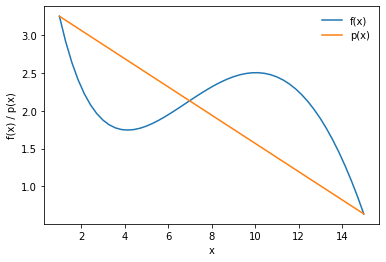

In [7]:
x_p = np.arange(1, 16, 1) # генерируем значения от 1 до 16 (не включая 16) с шагом 1
y_p = 3.43914511139233 - 0.18692824612091097 * x_p

plt.plot(x, y, label = 'f(x)') 
plt.plot(x_p, y_p, label = 'p(x)')
plt.legend(loc = 'best', frameon = False)
plt.ylabel('f(x) / p(x)')
plt.xlabel('x')
plt.show()

Повторим те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15.

Многочлен второй степени имеет вид: $ a_0 + a_1 \cdot x + a_2 \cdot x^{2} = g(x) $

In [8]:
coordinate_3 = [1, f(1)]
coordinate_4 = [8, f(8)]
coordinate_5 = [15, f(15)]
print('Значение функции в точке x = 1 равно f(1) =', coordinate_3[1], 
      '\nЗначение функции в точке x = 8 равно f(8) =', coordinate_4[1], 
      '\nЗначение функции в точке x = 15 равно f(15) =', coordinate_5[1])

Значение функции в точке x = 1 равно f(1) = 3.252216865271419 
Значение функции в точке x = 8 равно f(8) = 2.316170159053224 
Значение функции в точке x = 15 равно f(15) = 0.6352214195786656


Найдём коэффициенты $a_n$ многочлена второй степени $g(x)$, зная, через какие точки он проходит.

$$ \begin{cases}\begin{array}{11} a_0 + a_1 \cdot 1 + a_2 \cdot 1^{2} = 3.252216865271419 \\ a_0 + a_1 \cdot 8 + a_2 \cdot 8^{2} = 2.316170159053224 \\ a_0 + a_1 \cdot 15 + a_2 \cdot 15^{2}  = 0.6352214195786656 \end{array}\end{cases} $$

Матрица коэффициентов A и свободный вектор b:

$$ A = \begin{pmatrix} 1 & 1 & 1 \\ 1 & 8 & 64 \\ 1 & 15 & 225 \end{pmatrix} \qquad b = \begin{pmatrix} 3.252216865271419 \\ 2.316170159053224 \\ 0.6352214195786656 \end{pmatrix} $$

Решим систему линейных уравнений с помощью функции scipy.linalg.solve.

In [9]:
A_2 = np.array([[1, 1, 1], [1, 8, 64], [1, 15, 225]])
b_2 = np.array([3.252216865271419, 2.316170159053224, 0.6352214195786656])
coefficients_2 = linalg.solve(A_2, b_2)
print('Коэффициент a_0 равен', coefficients_2[0],
      '\nКоэффициент a_1 равен', coefficients_2[1],
      '\nКоэффициент a_2 равен', coefficients_2[2])

Коэффициент a_0 равен 3.3251294940571725 
Коэффициент a_1 равен -0.06531158763007616 
Коэффициент a_2 равен -0.007601041155677175


Нарисуем функцию $f(x)$ и полученный многочлен $g(x)$:

$$ g(x) = 3.3251294940571725 - 0.06531158763007616 \cdot x - 0.007601041155677175 \cdot x^{2} $$

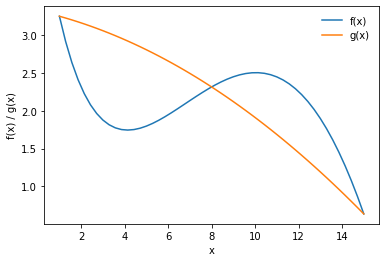

In [10]:
x_g = np.linspace(1, 15, 50)
y_g = 3.3251294940571725 - 0.06531158763007616 * x_g - 0.007601041155677175 * (x_g ** 2)

plt.plot(x, y, label = 'f(x)') 
plt.plot(x_g, y_g, label = 'g(x)')
plt.legend(loc = 'best', frameon = False)
plt.ylabel('f(x) / g(x)')
plt.xlabel('x')
plt.show()

Качество аппроксимации улучшилось, но не намного.
Повторим те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15.

Многочлен третьей степени имеет вид: $ a_0 + a_1 \cdot x + a_2 \cdot x^{2} + a_3 \cdot x^{3} = u(x) $

In [11]:
coordinate_6 = [1, f(1)]
coordinate_7 = [4, f(4)]
coordinate_8 = [10, f(10)]
coordinate_9 = [15, f(15)]
print('Значение функции в точке x = 1 равно f(1) =', coordinate_6[1],
      '\nЗначение функции в точке x = 4 равно f(4) =', coordinate_7[1],
      '\nЗначение функции в точке x = 10 равно f(10) =', coordinate_8[1],
      '\nЗначение функции в точке x = 15 равно f(15) =', coordinate_9[1])

Значение функции в точке x = 1 равно f(1) = 3.252216865271419 
Значение функции в точке x = 4 равно f(4) = 1.7468459495903677 
Значение функции в точке x = 10 равно f(10) = 2.5054164070002463 
Значение функции в точке x = 15 равно f(15) = 0.6352214195786656


Найдём коэффициенты $a_n$ многочлена третьей степени $u(x)$, зная, через какие точки он проходит.

$$ \begin{cases}\begin{array}{11} a_0 + a_1 \cdot 1 + a_2 \cdot 1^{2} + a_3 \cdot 1^{3} = 3.252216865271419 \\ a_0 + a_1 \cdot 4 + a_2 \cdot 4^{2} + a_3 \cdot 4^{3} = 1.7468459495903677 \\ a_0 + a_1 \cdot 10 + a_2 \cdot 10^{2} + a_3 \cdot 10^{3} = 2.5054164070002463 \\ a_0 + a_1 \cdot 15 + a_2 \cdot 15^{2} + a_3 \cdot 15^{3} = 0.6352214195786656 \end{array}\end{cases} $$

Матрица коэффициентов A и свободный вектор b:

$$ A = \begin{pmatrix} 1 & 1 & 1 & 1 \\ 1 & 4 & 16 & 64 \\ 1 & 10 & 100 & 1000 \\ 1 & 15 & 225 & 3375 \end{pmatrix} \qquad b = \begin{pmatrix} 3.252216865271419 \\ 1.7468459495903677 \\ 2.5054164070002463 \\ 0.6352214195786656 \end{pmatrix} $$

Решим систему линейных уравнений с помощью функции scipy.linalg.solve.

In [12]:
A_u = np.array([[1, 1, 1, 1], [1, 4, 16, 64], 
                [1, 10, 100, 1000], [1, 15, 225, 3375]])
b_u = np.array([3.252216865271419, 1.7468459495903677, 
                2.5054164070002463, 0.6352214195786656])
coefficients_3 = linalg.solve(A_u, b_u)
print('Коэффициент a_0 равен', coefficients_3[0],
      '\nКоэффициент a_1 равен', coefficients_3[1],
      '\nКоэффициент a_2 равен', coefficients_3[2],
      '\nКоэффициент a_3 равен', coefficients_3[3])

Коэффициент a_0 равен 4.362641535118072 
Коэффициент a_1 равен -1.2955258656948434 
Коэффициент a_2 равен 0.1933368470215116 
Коэффициент a_3 равен -0.008235651173320554


Нарисуем функцию $f(x)$ и полученный многочлен $u(x)$:

$$ u(x) = 4.362641535118072 - 1.2955258656948434 \cdot x + 
0.1933368470215116 \cdot x^{2} - 0.008235651173320554 \cdot x^{3} $$

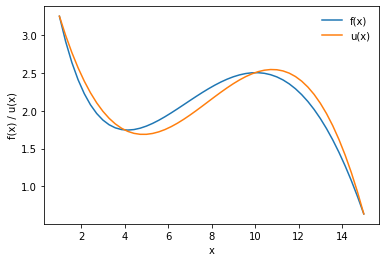

In [13]:
x_u = np.linspace(1, 15, 50)
y_u = 4.362641535118072 - 1.2955258656948434 * x_u +\
0.1933368470215116 * (x_u ** 2) - 0.008235651173320554 * (x_u ** 3)

plt.plot(x, y, label = 'f(x)') 
plt.plot(x_u, y_u, label = 'u(x)')
plt.legend(loc = 'best', frameon = False)
plt.ylabel('f(x) / u(x)')
plt.xlabel('x')
plt.show()

Итоговый многочлен третьей стпени хорошо аппроксимирует функцию f на промежутке [1, 15]